# **[CMPS 3160 Final Project](https://wenqiy26.github.io/)** 
## Name: Aaron Yang & Wendy Yang 
## Title:  Average SAT Scores Predictors for all 50 States

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%%shell

cd drive/MyDrive/Colab\ Notebooks/Project_folder

jupyter nbconvert --to html Milestone1.ipynb


/bin/bash: line 1: cd: drive/MyDrive/Colab Notebooks/Project_folder: No such file or directory
[NbConvertApp] Converting notebook Milestone1.ipynb to html
[NbConvertApp] Writing 516128 bytes to Milestone1.html


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Project_folder

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks/Project_folder


# **Project Goals**
The goal of this project is to investigate the correlation between average SAT score and different varaibles and see which variables are good indicators to predict average STA score for a state. Variables include economic distributions such as median household income and expenses, overall education level of a state, education cost of a state, etc.

Our hypothesis is that the average SAT score has a positive correlation with the median household income. The average SAT score would also have a positive correlation with percentage of adults having high school diploma and percentage of adults having college degree. 

# **Collaboration Plan**
For the collaboration of the group, we start on it right after every Wednesday and Friday after Data Science class as a group time to meet, talk about next steps, and divide tasks. We will be working on smaller tasks individually and discuss our preogress together.  For what technologies we use, we use Google Collab and we share our codes through our repositories in GitHub in order to make changes to any sort of files or edits. Through this collaboration, we are able to make changes on our page individually. 

# **ETL (Extraction, Transform, and Load)**

For our analysis, we loaded one dataset that was taken from Cengage. From the data in [Cengage](https://www.cengage.com/cgi-wadsworth/course_products_wp.pl?fid=M20b&flag=student&product_isbn_issn=9780495109723&discipline_number=17). The data set is downloaded as a CSV file and we renamed it to MilestoneData.csv. Then, we uploaded the CSV file into the Google Drive and import it Google Collab. It displays the first two columns which is the state and region as categorical data, the rest would be quantitative. 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option("display.max_rows", None, "display.max_columns", None)
df = pd.read_csv('MilestoneData.csv')
df.head()

,state,region,pop,area,density,metro,waste,energy,miles,toxic,green,house,senate,csat,vsat,msat,percent,expense,income,high,college
0,Alabama,South,4041000.0,52423.0,77.08,67.4,1.11,393.0,10.5,27.86,29.25,30.0,10.0,991,476,515,8,3627,27.498,66.9,15.7
1,Alaska,West,550000.0,570374.0,0.96,41.1,0.91,991.0,7.2,37.41,NaN,0.0,20.0,920,439,481,41,8330,48.254,86.6,23.0
2,Arizona,West,3665000.0,113642.0,32.25,79.0,0.79,258.0,9.7,19.65,18.37,13.0,33.0,932,442,490,26,4309,32.093,78.7,20.3
3,Arkansas,South,2351000.0,52075.0,45.15,40.1,0.85,330.0,8.9,24.60,26.04,25.0,37.0,1005,482,523,6,3700,24.643,66.3,13.3
4,California,West,29800000.0,155973.0,190.80,95.7,1.51,246.0,8.7,3.26,15.65,50.0,47.0,897,415,482,47,4491,41.716,76.2,23.4


# **SAT Data by Economic and Region Data**

There are many columns to this dataset that was not needed, so a majority of the columns that did not coorelate well with our data was disregarded and formed into a new dataset in order to make our observation easier. Now we are going to drop the unnecessary columns from this dataset to make our data more organized and readable. We will also neglect certain columns that do not pertain our dataset such as population, area, density, metro, waste, toxic, senate, energy, green, miles, and house. Then we will sort the index and values to find a correlation of SAT scores by various economic regions/state/ and income. Now, we only have 10 variables that we want to focus on: state, geographic region, mean composite SAT score, mean math SAT score, mean verbal SAT score, % HS graduates taking SAT, per pupil expenditures prim&sec, median household income ($1,000), % adults HS diploma, and % adults college degree. 

In [ ]:
#Drops variables that we don't need
df_drop=df.drop(labels=['pop', 'area','density','metro','waste','toxic','senate','energy','green','miles','house'], axis=1)
df_drop.head()

,state,region,csat,vsat,msat,percent,expense,income,high,college
0,Alabama,South,991,476,515,8,3627,27.498,66.9,15.7
1,Alaska,West,920,439,481,41,8330,48.254,86.6,23.0
2,Arizona,West,932,442,490,26,4309,32.093,78.7,20.3
3,Arkansas,South,1005,482,523,6,3700,24.643,66.3,13.3
4,California,West,897,415,482,47,4491,41.716,76.2,23.4


We can see that state and region are categorical, while csat, vsat, msat, percent, expense, income, high, and college are all quantitative. 
The data set has a defult index. Our first step is to set states as the index. 

In [ ]:
# list the data type for all variables 
display(df_drop.dtypes)
df_by_state = df_drop.set_index("state")
df_by_state.head()

state       object
region      object
csat         int64
vsat         int64
msat         int64
percent      int64
expense      int64
income     float64
high       float64
college    float64
dtype: object

,region,csat,vsat,msat,percent,expense,income,high,college
state,,,,,,,,,
Alabama,South,991,476,515,8,3627,27.498,66.9,15.7
Alaska,West,920,439,481,41,8330,48.254,86.6,23.0
Arizona,West,932,442,490,26,4309,32.093,78.7,20.3
Arkansas,South,1005,482,523,6,3700,24.643,66.3,13.3
California,West,897,415,482,47,4491,41.716,76.2,23.4


# **Exploratory Data Analysis (EDA)**

First, we would like to see the distribution of the average composite SAT scores for different states. 
To see the distribution of the average composite SAT score, we use a histogram to visualize the distrubution for difference states. 

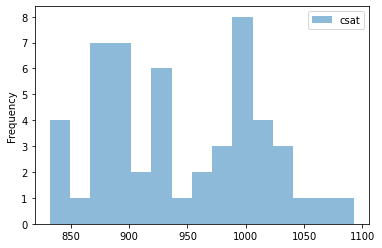

In [ ]:
# plot a histogram showing average SAT scores distribution 
df_by_state["csat"].plot.hist(bins=15,legend=True, alpha=.5)

To see which states have the highest average composite SAT score. We start by sorting the data set, we find out that Iowa, North Dakota, and South Dakota are the top three states with the highest average composite SAT score. 

In [ ]:
# Sort csat decending to find the states with highest average composite SAT score
df_by_sat = df_by_state.sort_values("csat",ascending=False)
df_by_sat.head()

,region,csat,vsat,msat,percent,expense,income,high,college
state,,,,,,,,,
Iowa,Midwest,1093,515,578,5,4679,30.565,80.1,16.9
North Dakota,Midwest,1073,502,571,6,4199,27.051,76.7,18.1
South Dakota,Midwest,1047,496,551,5,3965,26.223,77.1,17.2
Kansas,Midwest,1039,493,546,10,4874,31.803,81.3,21.1
Utah,West,1031,494,537,5,2960,34.342,85.1,22.3


Next, we would love to see if there any correlations between average composite SAT scores and percentage of adults having a high school diploma/college degress by using a scatterplot. 

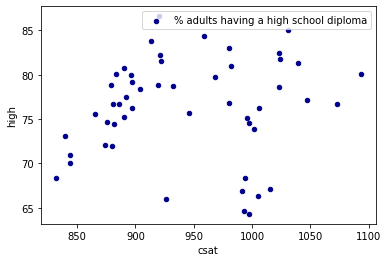

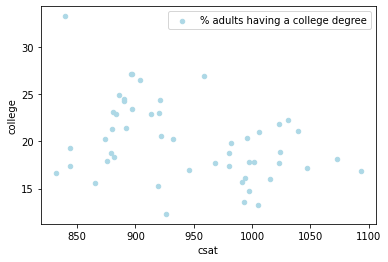

In [ ]:
# Plot a scatterplot to show the correlation between average composite SAT scores and percentage of adults having a high school diploma 
df_by_state.plot.scatter(y="high", x="csat", color='DarkBlue',label="% adults having a high school diploma")
df_by_state.plot.scatter(y="college", x="csat", color='LightBlue',label="% adults having a college degree")

We can see that there is a positive correlation between average composite SAT scores and percentage of adults having a high school diploma. There is a negative correlation between average composite SAT scores and percentage of adults having a college degree. This first result supports our hypothesis and the second result is quite surprising. 

However, given that the top SAT states seem to be very rural, it could be the case that these states also have a smaller fraction of people who take the SAT and that could explain the trend. We think it'd be interesting to see if there's any correlation between median household income and the average SAT score.

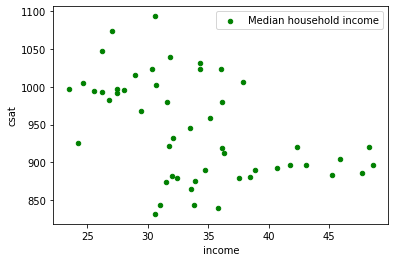

In [ ]:
df_by_state.plot.scatter(y="csat", x="income", color='Green',label="Median household income")

From the scatterplot, we can see that there is a negative correlation between the median household income and the avergae SAT score. Our new hypothesis is that rural area (area with low median household income), has a smaller fraction of students taking SAT. These students tend to be high-performance and high achieving students, resulting a higher average SAT score. 

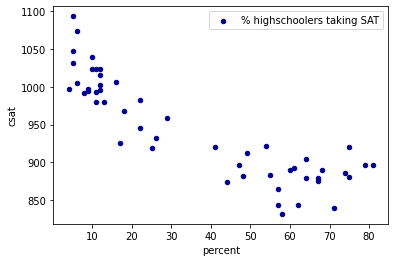

In [ ]:
df_by_state.plot.scatter(y="csat", x="percent", color='DarkBlue',label="% highschoolers taking SAT")

Based on the graph, there is a negative correlation between percentage of high schoolers taking SAT and the average SAT score. This explains that why the top SAT states are states that are more on the rural side. Given that only a small percentage of high schoolers from these states are taking SAT, it is very likely that only high-achieving students are taking the SAT and thus the mean SAT is high compared to states that having a large percentage of high schoolers taking the SAT. 

Now, let's see which variables among the list are strong predictors for average SAT score.

In [ ]:
df_by_state.corr()

,csat,vsat,msat,percent,expense,income,high,college
csat,1.000000,0.991312,0.993034,-0.875806,-0.466298,-0.471260,0.085778,-0.372943
vsat,0.991312,1.000000,0.968908,-0.871227,-0.472506,-0.502519,0.049127,-0.380991
msat,0.993034,0.968908,1.000000,-0.866991,-0.453860,-0.436308,0.117344,-0.360234
percent,-0.875806,-0.871227,-0.866991,1.000000,0.650935,0.673345,0.141303,0.609065
expense,-0.466298,-0.472506,-0.453860,0.650935,1.000000,0.678412,0.313279,0.639996
income,-0.471260,-0.502519,-0.436308,0.673345,0.678412,1.000000,0.509908,0.723354
high,0.085778,0.049127,0.117344,0.141303,0.313279,0.509908,1.000000,0.531876
college,-0.372943,-0.380991,-0.360234,0.609065,0.639996,0.723354,0.531876,1.000000


Just like what we saw in the graph, percentage of high schoolers taking SAT is a strong predictor for average SAT score for a state, and median household income and expenditure for primary and secondary school follow. 

Now, we will add in extra datasets downloaded from [National Center for Educational Statistics](https://nces.ed.gov/programs/digest/d21/tables/dt21_226.40.asp) for SAT statistics for each state for a different year and analyze it.

In [ ]:
# We are importing the dataset for year of 2021
import pandas as pd
df2 = pd.read_csv("Data2.csv")
df2.head()

,State,Total SAT Mean score,Total SAT SD,Writing Mean score,Writing SD,Math Mean score,Math SD,Percentage of high schoolers taking SAT
0,Alabama,1165,199,593,100,572,111,5
1,Alaska,1080,176,547,94,533,94,38
2,Arizona,1116,179,563,92,553,98,30
3,Arkansas,1208,198,614,103,594,107,3
4,California,1055,186,531,95,524,103,53


Let's sex state as the index and have a closer look. This second dataset also supports our hypothesis that different states have drastic different percentage of students taking the SAT, ranging from below 10% to above 80%This can explain why surprisingly, rural states (states with lower median household income) have a higher average SAT score. 

In [ ]:
# Set the index with state 
df2_by_state = df2.set_index("State")
df2_by_state.head()


,Total SAT Mean score,Total SAT SD,Writing Mean score,Writing SD,Math Mean score,Math SD,Percentage of high schoolers taking SAT
State,,,,,,,
Alabama,1165,199,593,100,572,111,5
Alaska,1080,176,547,94,533,94,38
Arizona,1116,179,563,92,553,98,30
Arkansas,1208,198,614,103,594,107,3
California,1055,186,531,95,524,103,53


Here, we use a histogram to find the distribution for the total mean score which is more in the range of 1050-1075.

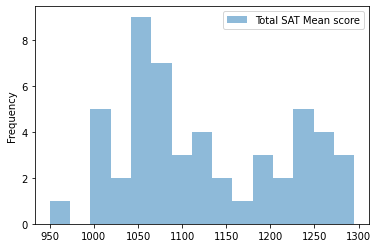

In [ ]:
# Plot a histogram for total SAT mean score for each state in 2021
df2_by_state["Total SAT Mean score"].plot.hist(bins=15,legend=True, alpha=.5)

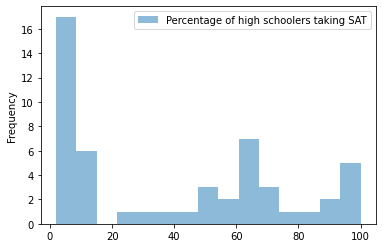

In [ ]:
# Plot a histogram for Percentage of high schoolers taking SAT for each state in 2021
df2_by_state["Percentage of high schoolers taking SAT"].plot.hist(bins=15,legend=True, alpha=.5)

# Model

Here, we want to train our data into a model that we can use to better represent the data given. 

We can see for our model that it has a positive coorelation as x the axis tends higher and the y axis are directly proportional rather than an inversely proportional relationship. 

4      878.914583
3      883.908889
2      886.907500
5      929.987200
6      936.273981
8      948.670365
7      958.723401
9      962.961111
10     987.832833
11    1051.282452
12    1116.800440
13    1201.637968
14    1208.706854
15    1234.866104
17    1244.757970
16    1272.124206
18    1277.362726
19    1314.384303
1     1343.136667
20    1352.886983
21    1438.091308
22    1515.142893
23    1609.336333
24    1695.867946
25    1774.409787
26    1878.208683
27    2046.466717
28    2178.670582
29    2358.207994
30    2580.685489
31    2765.880434
32    2942.005573
33    3110.868479
34    3272.163230
35    3443.962441
36    3577.640664
37    3730.884614
38    3883.478813
39    4009.222378
40    4121.081379
41    4230.122036
42    4322.858970
43    4390.313497
44    4524.727626
45    4611.545511
dtype: float64

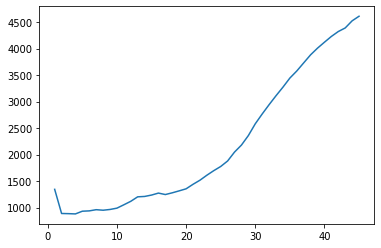

In [ ]:
import numpy as np
from sklearn.feature_extraction import DictVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline

features = ["percent","expense","income"]
X_dict = df_by_state[features].to_dict(orient="records")
y = df_by_state["csat"]

# Specify pipeline
vec = DictVectorizer(sparse=False)
scaler = StandardScaler()
model = KNeighborsRegressor(n_neighbors=10)
pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])

from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X_dict, y, 
                         cv=5, scoring="neg_mean_squared_error")
scores

vec = DictVectorizer(sparse=False)
scaler = StandardScaler()

# calculates estimate of test error based on 10-fold cross validation
def get_cv_error(k):
    model = KNeighborsRegressor(n_neighbors=k)
    pipeline = Pipeline([("vectorizer", vec), ("scaler", scaler), ("fit", model)])
    mse = np.mean(-cross_val_score(
        pipeline, X_dict, y, 
        cv=10, scoring="neg_mean_squared_error"
    ))
    return mse
    
ks = pd.Series(range(1, 46))
ks.index = range(1, 46)
test_errs = ks.apply(get_cv_error)

test_errs.plot.line()
test_errs.sort_values()

For this code, we trained our model with our central datapoint being csat as the observation, so we used KNeighbors Regressor with n_neighbors to 10 to fit our model. Our result gave us a good rmse which supports which model would be best to use to train our data. 

In [ ]:
train = df_by_state.sample(frac=.5)
val = df_by_state.drop(train.index)

X_train_dict = train[features].to_dict(orient="records")
X_val_dict = val[features].to_dict(orient="records")

y_train = train["csat"]
y_val = df_by_state["csat"]

def get_val_error(X_train_dict, y_train, X_val_dict, y_val):

    # Dummy variables
    vec = DictVectorizer(sparse=False)
    vec.fit(X_train_dict)
    X_train = vec.transform(X_train_dict)
    X_val = vec.transform(X_val_dict)

    # standardize 
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train_sc = scaler.transform(X_train)
    X_val_sc = scaler.transform(X_val)

    model = KNeighborsRegressor(n_neighbors=10)
    model.fit(X_train_sc, y_train)

    y_val_pred = model.predict(X_val_sc)
    rmse = np.sqrt(((y_val - y_val_pred) ** 2).mean())

    return rmse

#Check Cross#
def cross_val(a, b, c, d):
  return (get_val_error(a, b, c, d) + get_val_error(c, d, a, b))/2

train = df_by_state.sample(frac=.5)
val = df_by_state.drop(train.index)

X_train_dict = train[features].to_dict(orient="records")
X_val_dict = val[features].to_dict(orient="records")

y_train = train["csat"]
y_val = val["csat"]

cross_val(X_train_dict, y_train, X_val_dict, y_val)


38.87263016284891

We want to organize and transform our data to compare our predictors and actual model, so fitted a 4 nearest neighbors model to see which states are closely related just based by other features but heavily focused on csat as its central point. From the graph, we can see that for our blue which is our actual: Iowa, North Dakota, and South Dakota have some of the highest distributions in the graph compared to others. Our prediction models which is the orange graph stated that while Iowa, North Dakota, and South Dakota are some of the highest, there are states that are closely related such as Louisiana, Kentucky, and Kansas. 

numpy.ndarray

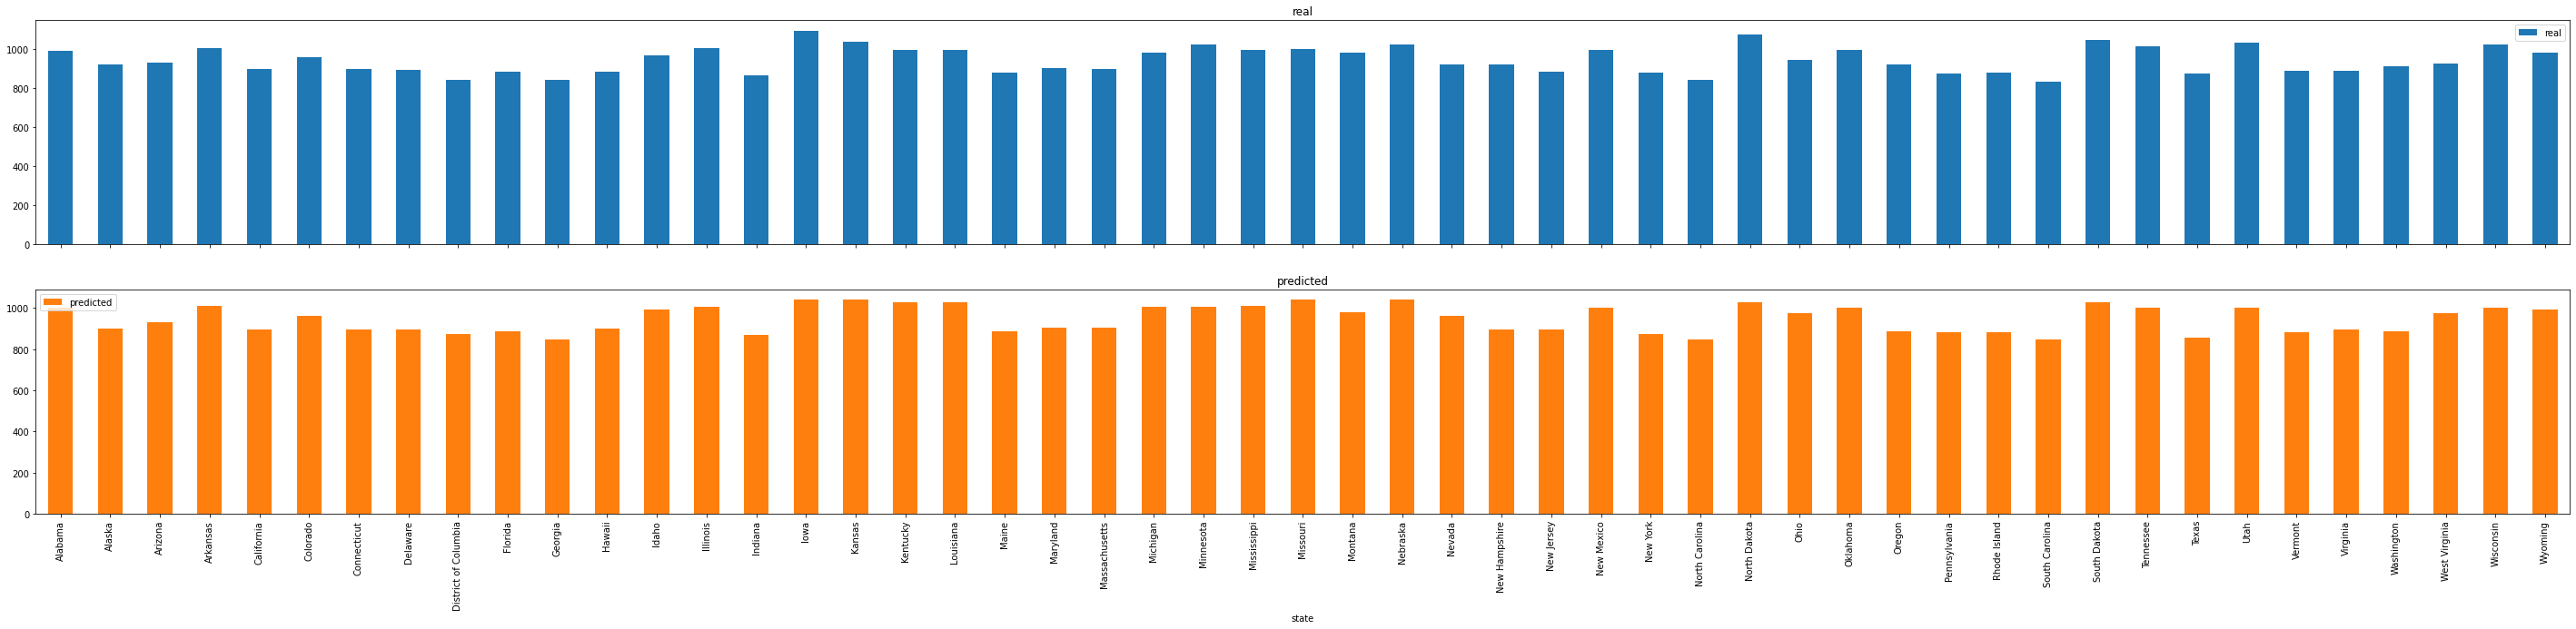

In [ ]:

X_train_dict = df_by_state[features].to_dict(orient="records")
y_train = df_by_state["csat"]

vec = DictVectorizer(sparse=False)
vec.fit(X_train_dict)
X_train = vec.transform(X_train_dict)

scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)

# Fit a 4-nearest neighbors model.
model = KNeighborsRegressor(n_neighbors=4)
model.fit(X_train_sc, y_train)

# Calculate the model predictions on the training data.
y_train_pred = model.predict(X_train_sc)
y_train_pred

dict = {'real': y_train, 'predicted': y_train_pred} 
df_graph = pd.DataFrame(dict)
df_graph

axis = df_graph.plot.bar(subplots=True,figsize=(50,10))
type(axis)

# Final Conclusion 
There are a few good predictors to predict average SAT scores for state: 

Negative Correlation:
- Median household income
- Pupil expenditure in primary and secondary school
- % of adults having a college degree
- % of high schoolers taking SAT

Positive Correlation:
- % of adults having a high school diploma

Among them, % of high schoolers taking SAT is the strongest indicator. We believe that as top SAT states are states that are more on the rural side and there is a huge variation in terms of % of high schoolers taking SAT acorss states, there are only small percentages of high schoolers from these rural states are taking SAT. Only high-achieving and high-performance students are taking the SAT. Thus the mean SAT is high compared to states that having a large percentage of high schoolers taking the SAT.


Our model supports our conclusion such that Iowa, South Dakota, and North Dakota have some of the highest csats given. For students in the df_by_state function, the features have furthermore supported our model into these specific states. Therefore, the distributions have justified our final conclusion that those in rural areas take the SAT are more prepared than those that are not in. 
